In [1]:
from Point import Point
from Trips import Trips
from Simulation import Simulation
from Solver import Solver
import time
import matplotlib.pyplot as plt

# Single simulation
## Preparate Data

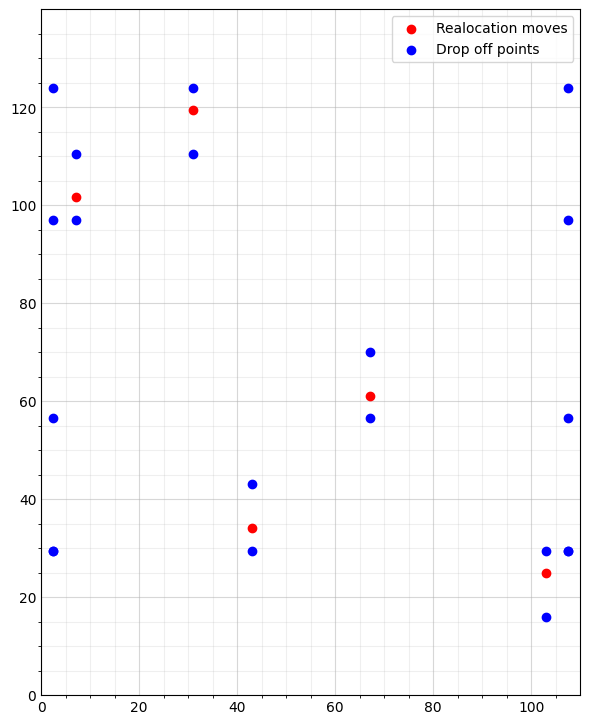

In [2]:
n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(0)
J,D=Simulation.initialize_map(n)
Simulation.plot_map(J,D,[],figsize=(5.5,7))


# Solution of problem using Gurobi

In [3]:
start_time = time.time()
trips_problem=Solver.trptr_problem(n,m,J,D,Point(0,0),Point(0,0),time_limit=300)
execution_time_problem=time.time()-start_time

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-29
Set parameter TimeLimit to value 300
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2827 rows, 312 columns and 12122 nonzeros
Model fingerprint: 0x5c023465
Variable types: 42 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 5 rows and 5 columns
Presolve time: 0.02s
Presolved: 2822 rows, 307 columns, 12112 nonzeros
Variable types: 42 continuous, 265 integer (265 binary)
Found heuristic solution: objective 184.1152439

Root relaxation: objective 2.986613e+01, 45 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

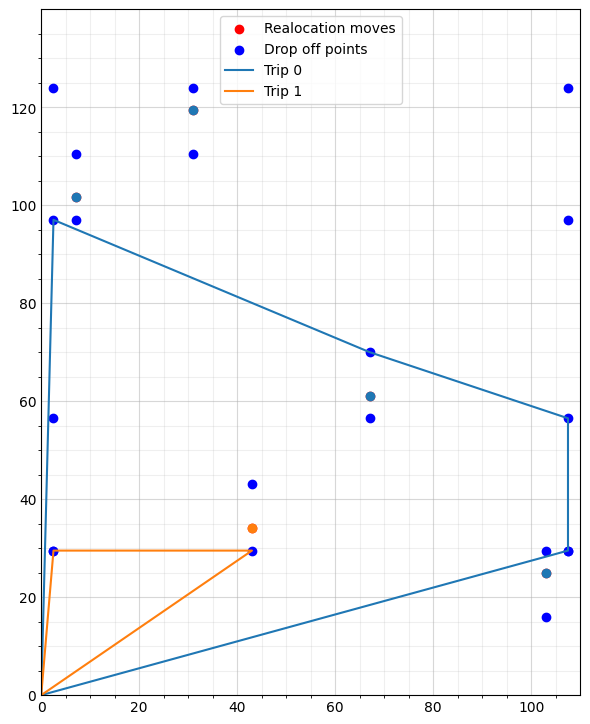

In [4]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

# Solution of the problem using the heuristics


In [5]:
start_time = time.time()
trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))
execution_sa=time.time()-start_time

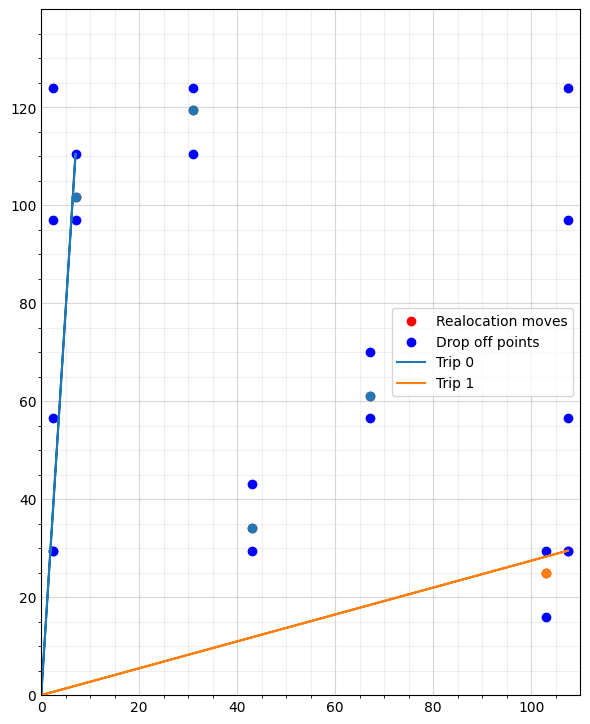

In [6]:
Simulation.plot_map(J,D,trips,figsize=(5.5,7))

### Select-and-assign matheuristic (SAM)

In [7]:
start_time = time.time()
trips_sam=Solver.sam_matheuristic(n, m, J, D, trips,time_limit=60)
execution_sam=time.time()-start_time

Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 17 rows, 14 columns and 42 nonzeros
Model fingerprint: 0xc0e11687
Variable types: 2 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 188.9324570
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolved: 12 rows, 7 columns, 38 nonzeros
Variable types: 2 continuous, 5 integer (5 binary)

Root relaxation: objective 1.225787e+02, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  122.57871    0    1  188.93246  122.57871  35.1%     -    0s
H    0     0

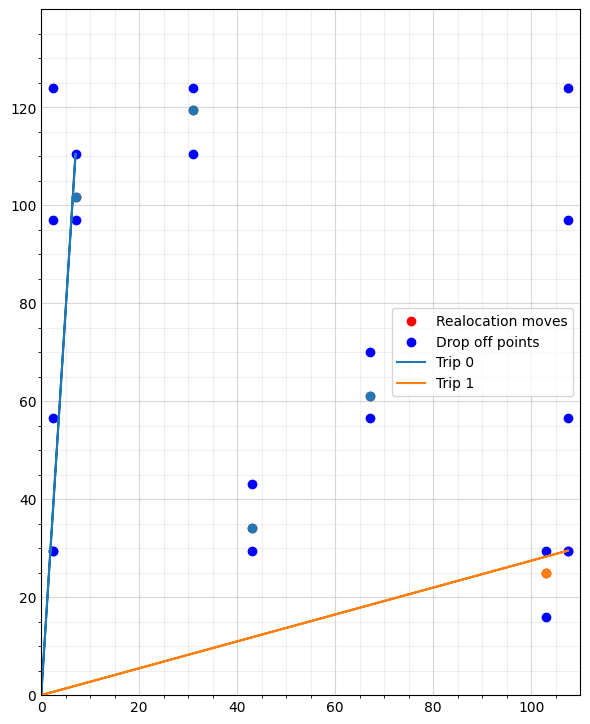

In [8]:
Simulation.plot_map(J,D,trips_sam,figsize=(5.5,7))

#### SAM-Local search

In [9]:
start_time = time.time()
trips_sam_ls=Solver.local_search(n,m,J, D, 100000,trips_sam)
execution_sam_ls=time.time()-start_time

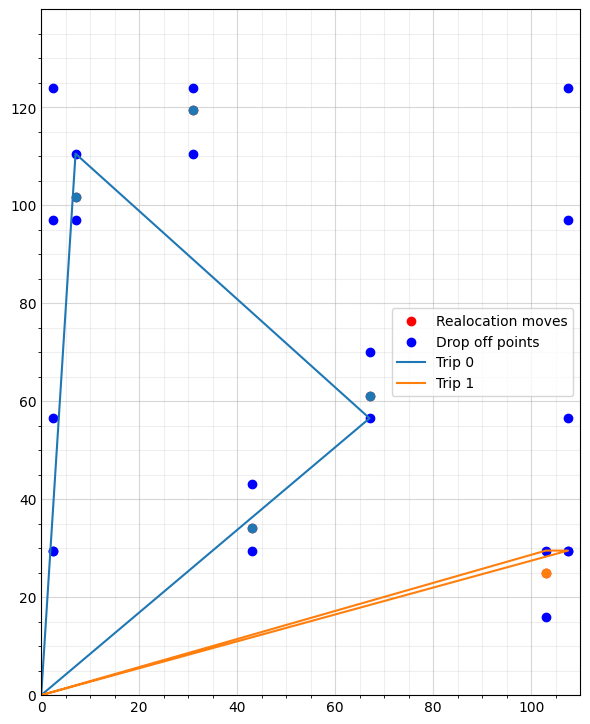

In [10]:
Simulation.plot_map(J,D,trips_sam_ls,figsize=(5.5,7))

### Select matheuristic (SM)

In [11]:
start_time = time.time()
trips_sm=Solver.sm_matheuristic(J,D,trips)
execution_sm=time.time()-start_time

Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 2 columns and 5 nonzeros
Model fingerprint: 0xd1245aca
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 132.8893561
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 132.889 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.328893560517e+02, best bound 1.328893560517e+02, gap 0.0000%


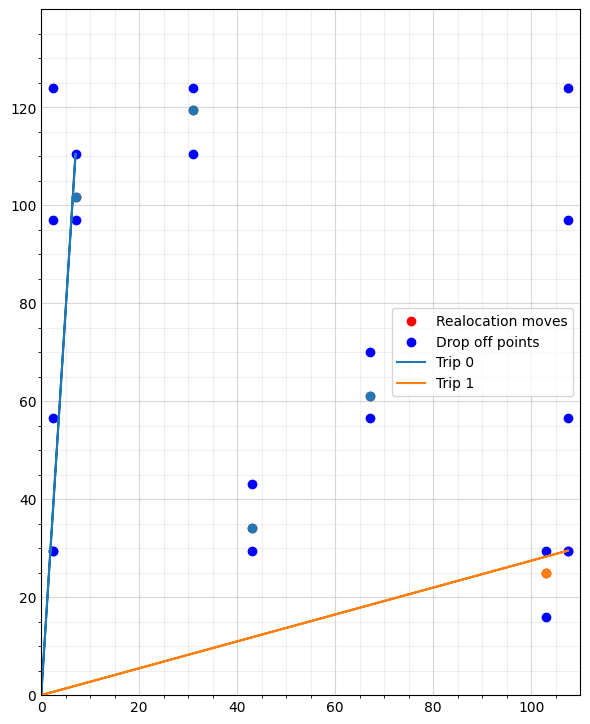

In [12]:
Simulation.plot_map(J,D,trips_sm,figsize=(5.5,7))

#### SM -Local search


In [13]:
start_time = time.time()
trips_sm_ls=Solver.local_search(n,m,J, D, 100000,trips_sm)
execution_sm_ls=time.time()-start_time

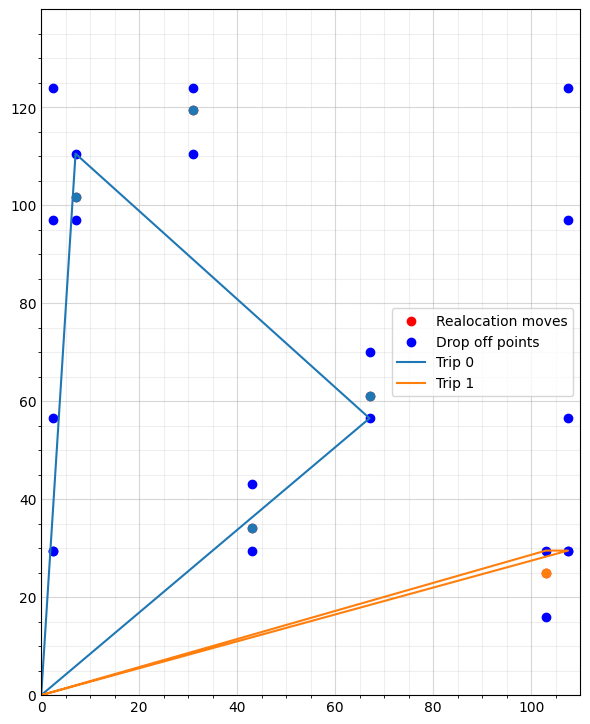

In [14]:
Simulation.plot_map(J,D,trips_sm_ls,figsize=(5.5,7))

## Comparison


### comparison of travel times obtained

In [15]:
travel_time_problem=Trips.get_total_duration(trips_problem)
travel_time_sam=Trips.get_total_duration(trips_sam_ls)
travel_time_sm=Trips.get_total_duration(trips_sm_ls)
print(f"travel time problem ={travel_time_problem}")
print(f"travel time sam ={travel_time_sam}")
print(f"travel time sm ={travel_time_sm}")

travel time problem =95.97817693159905
travel time sam =111.32134292565948
travel time sm =111.32134292565948


### Graphical comparison

### Travel map of problem solved with gurobi

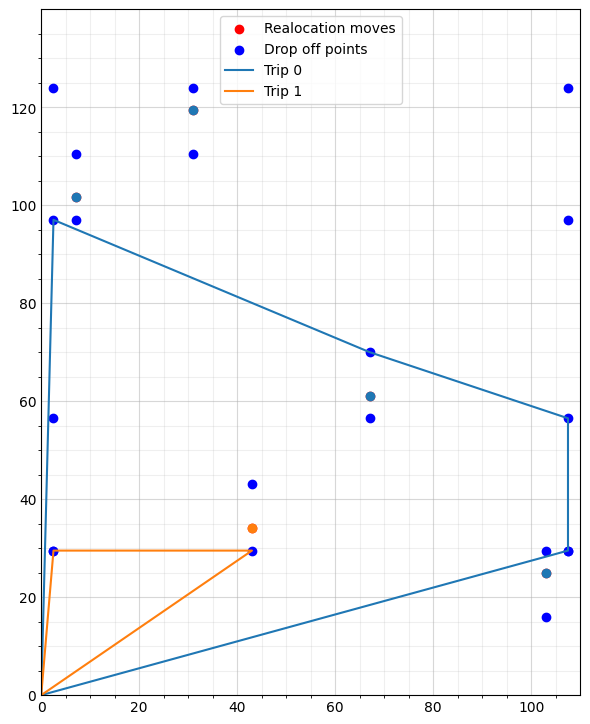

In [16]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

### Travel map of problem solved with SAM

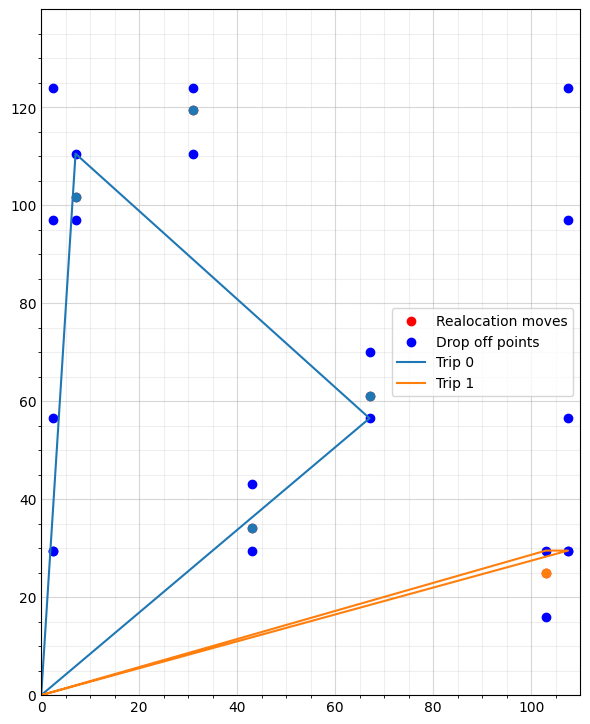

In [17]:
Simulation.plot_map(J,D,trips_sam_ls,figsize=(5.5,7))

### Travel map of problem solved with SM

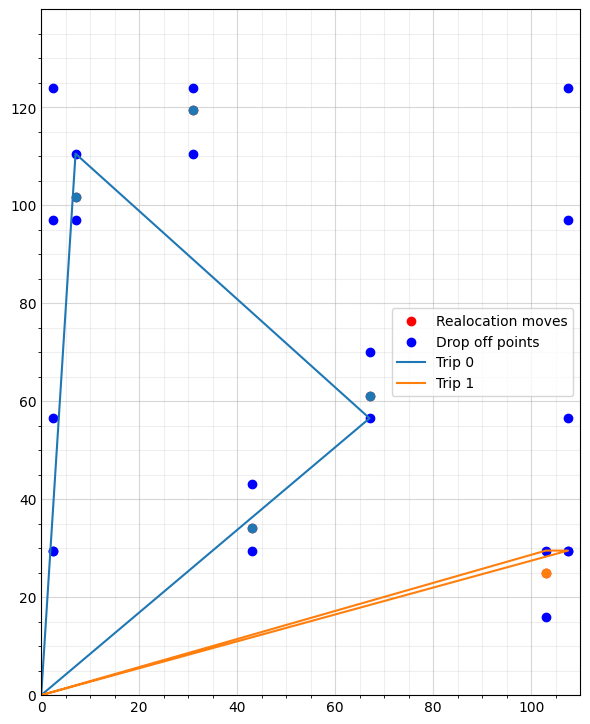

In [18]:
Simulation.plot_map(J,D,trips_sm_ls,figsize=(5.5,7))

### Running time comparison


In [19]:
total_time_sam=execution_sa+execution_sam+execution_sam_ls
total_time_sm=execution_sa+execution_sm+execution_sm_ls
print(f'running time problem solved with Gurobi ={execution_time_problem}')
print(f'running time problem using SMA heuristic ={total_time_sam}')
print(f'running time problem using SM heuristic ={total_time_sm} \n')

print("Time spent by heuristics SMA in phases:")
print(f"tima SA={execution_sa} in percentage {execution_sa/total_time_sam*100}%")
print(f"tima SAM-MIP={execution_sam} in percentage {execution_sam/total_time_sam*100}%")
print(f"tima LC={execution_sam_ls} in percentage {execution_sam_ls/total_time_sam*100}%")

print("")
print("Time spent by heuristics SM in phases:")
print(f"tima SA={execution_sa} in percentage {execution_sa/total_time_sm*100}%")
print(f"tima SM-MIP={execution_sm} in percentage {execution_sm/total_time_sm*100}%")
print(f"tima LC={execution_sm_ls} in percentage {execution_sm_ls/total_time_sm*100}%")


running time problem solved with Gurobi =300.319748878479
running time problem using SMA heuristic =78.81920027732849
running time problem using SM heuristic =76.6929543018341 

Time spent by heuristics SMA in phases:
tima SA=29.86009407043457 in percentage 37.88428957077799%
tima SAM-MIP=0.04610896110534668 in percentage 0.058499656102967895%
tima LC=48.912997245788574 in percentage 62.057210773119046%

Time spent by heuristics SM in phases:
tima SA=29.86009407043457 in percentage 38.93459880671264%
tima SM-MIP=0.01888108253479004 in percentage 0.024619057521870033%
tima LC=46.813979148864746 in percentage 61.04078213576549%


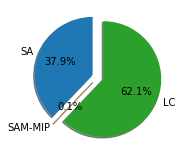

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SA', 'SAM-MIP', 'LC'
sizes = [execution_sa/total_time_sam*100, execution_sam/total_time_sam*100, execution_sam_ls/total_time_sam*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


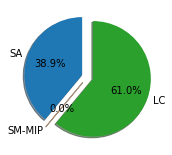

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SA', 'SM-MIP', 'LC'
sizes = [execution_sa/total_time_sm*100, execution_sm/total_time_sm*100, execution_sm_ls/total_time_sm*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
